In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Mounted at /content/drive


# Data Dictionary


### Metadata Columns

| Column    | Description                                         |
|-----------|-----------------------------------------------------|
| **GVKEY** | Unique company identifier in Compustat              |
| **fyear** | Fiscal year of the data                             |
| **tic**   | Stock ticker symbol                                 |
| **conm**  | Company name                                        |
| **dlrsn** | Delisting reason (Compustat code; **1** = bankruptcy) |
| **ggroup**| GICS industry group code                            |

### Financial Metrics Columns

| Ratio                      | Full Name                                    | Formula                                                                                               |
|----------------------------|----------------------------------------------|-------------------------------------------------------------------------------------------------------|
| **working_capital_ratio**             | Working Capital Ratio           | Current Assets ÷ Current Liabilities                                           |
| **roe**                    | Return on Equity                             | Net Income ÷ Common Equity                                                                            |
| **roa**                    | Return on Assets                             | Net Income ÷ Total Assets                                                                             |
| **gross_profit_margin**    | Gross Profit Margin                          | (Revenue − Cost of Goods Sold) ÷ Revenue                                                              |
| **re_to_assets**           | Retained Earnings to Assets                  | Retained Earnings ÷ Total Assets                                                                      |
| **ebit_to_assets**         | EBIT to Assets                               | Earnings Before Interest and Taxes ÷ Total Assets                                                     |
| **ebitda_to_assets**       | EBITDA to Assets                             | Earnings Before Interest, Taxes, Depreciation, and Amortization ÷ Total Assets                        |
| **debt_to_equity**         | Debt to Equity                               | Total Debt ÷ Common Equity                                                                            |
| **debt_to_assets**         | Debt to Assets                               | Total Debt ÷ Total Assets                                                                             |
| **interest_coverage**      | Interest Coverage Ratio                      | Earnings Before Interest and Taxes ÷ Interest Expense                                                 |
| **equity_ratio**           | Equity Ratio                                 | Common Equity ÷ Total Assets                                                                          |
| **receivables_turnover**   | Receivables Turnover                         | Revenue ÷ Accounts Receivable                                                                          |
| **payables_turnover_days** | Payables Turnover Days                       | 365 × Accounts Payable ÷ Cost of Goods Sold                                                           |
| **asset_turnover**         | Asset Turnover                               | Revenue ÷ Total Assets                                                                                 |
| **ocf_to_debt**            | Operating Cash Flow to Debt                  | Operating Activities Net Cash Flow ÷ Total Debt                                                       |
| **free_cf_to_assets**      | Free Cash Flow to Assets                     | (Operating Activities Net Cash Flow − Capital Expenditures) ÷ Total Assets                            |
| **cf_margin**              | Cash Flow Margin                             | Operating Activities Net Cash Flow ÷ Revenue                                                          |
| **working_capital_to_assets** | Working Capital to Assets                | (Current Assets − Current Liabilities) ÷ Total Assets                                                  |


# Import Data Files & Merge

In [ ]:
# https://drive.google.com/file/d/1VfYIAz9ZpYXs04Yk0Yrh6PJKqKfU66vX/view?usp=sharing
url = 'https://drive.google.com/uc?id=1VfYIAz9ZpYXs04Yk0Yrh6PJKqKfU66vX'
data = pd.read_csv(url)
data.head()

,GVKEY,fyear,tic,conm,dlrsn,ggroup,working_capital_ratio,roe,roa,gross_profit_margin,...,debt_to_assets,interest_coverage,equity_ratio,receivables_turnover,payables_turnover_days,asset_turnover,ocf_to_debt,free_cf_to_assets,cf_margin,working_capital_to_assets
0,2615,2013,CAMPQ,CALAMP CORP,1,4520.0,1.190061,0.088646,0.065841,0.346553,...,0.010365,50.254795,0.742738,6.392342,48.559325,1.315946,12.279871,0.115377,0.096718,0.279603
1,2615,2014,CAMPQ,CALAMP CORP,1,4520.0,1.710797,0.109046,0.081474,0.359928,...,0.003396,84.256757,0.747149,5.230002,54.638729,1.236846,41.635174,0.104670,0.114303,0.396887
2,2615,2015,CAMPQ,CALAMP CORP,1,4520.0,5.027782,0.089418,0.044073,0.379529,...,0.363719,4.340355,0.492886,5.678892,52.259011,0.730349,0.339056,0.112089,0.168852,0.648351
3,2615,2016,CAMPQ,CALAMP CORP,1,4520.0,1.655477,-0.048419,-0.019366,0.444597,...,0.359748,1.634499,0.399967,5.208997,56.650872,0.860251,0.175690,0.043696,0.073472,0.315736
4,2615,2017,CAMPQ,CALAMP CORP,1,4520.0,1.887971,0.083538,0.035132,0.434222,...,0.326218,1.497957,0.420547,5.111931,62.550272,0.773610,0.433535,0.123797,0.182814,0.381308


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37752 entries, 0 to 37751
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GVKEY                      37752 non-null  int64  
 1   fyear                      37752 non-null  int64  
 2   tic                        37752 non-null  object 
 3   conm                       37752 non-null  object 
 4   dlrsn                      37752 non-null  int64  
 5   ggroup                     37752 non-null  float64
 6   working_capital_ratio      37752 non-null  float64
 7   roe                        37752 non-null  float64
 8   roa                        37752 non-null  float64
 9   gross_profit_margin        37752 non-null  float64
 10  re_to_assets               37752 non-null  float64
 11  ebit_to_assets             37752 non-null  float64
 12  ebitda_to_assets           37752 non-null  float64
 13  debt_to_equity             37752 non-null  flo

# EDA

## Inspect values of prediction/forecast variable: Bankruptcy

In [ ]:
df = data.copy()  # create new copy to use for EDA and modeling

# inspect values of prediction/forecast bankrupcty
df['dlrsn'].value_counts()  # 1.9%

,count
dlrsn,
0,37034
1,718


# Identify Industries

In [ ]:
# calculate the number of companies per industry
company_count_by_industry = df['ggroup'].value_counts()

# calculate the number of bankruptcies by industry
bankrupt_count_by_industry = df.groupby('ggroup')['dlrsn'].apply(lambda x: (x == 1).sum()).sort_values(ascending=False)

# merge dataframes to compare bankruptcy count and number of companies
industry_comparison = pd.DataFrame({
    'company_count': company_count_by_industry,
    'bankrupt_count': bankrupt_count_by_industry
})

# sort by bankruptcy count and inspect the results
industry_comparison = industry_comparison.sort_values(by='bankrupt_count', ascending=False)

industry_comparison.head(10)



# these are the industries with the most companies/bankruptcies that can be used for the model
# did this to ensure industries selected had enough bankruptcy information


,company_count,bankrupt_count
ggroup,,
3520.0,6133,187
3510.0,3065,98
1010.0,2520,74
2550.0,1585,63
4510.0,3005,44
2010.0,3661,37
2530.0,1750,36
3030.0,408,25
1510.0,2604,23


We want to focus on industries with more companies and bankruptcies. Based on the information above, we will be investigating the following:

* 3520 - Pharmaceuticals, Biotechnology & Life Sciences

* 3510 - Health Care Equipment & Services

* 1010 - Energy

* 2550 - Consumer Discretionary Distribution & Retail

* 4510 - Software & Services

* 2010 - Capital Goods

* 2530 - Consumer Services

* 3030 - Household & Personal Products

* 1510 - Materials

* 4520 - Technology Hardware & Equipment

## Checking & Managing Multi-Colinearity

In [ ]:
# Variance Inflation Factor (VIF)
# quantifies how much the variance of a regression coefficient is inflated due to collinearity with other features
# high VIF suggests that the feature is highly correlated with others

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


ratios = ['working_capital_ratio', 'roe', 'roa', 'gross_profit_margin', 're_to_assets',
          'ebit_to_assets', 'ebitda_to_assets', 'debt_to_equity', 'debt_to_assets',
          'interest_coverage', 'equity_ratio', 'receivables_turnover', 'payables_turnover_days',
          'asset_turnover', 'ocf_to_debt', 'free_cf_to_assets', 'cf_margin', 'working_capital_to_assets']

# create new dataframe using relevant ratios
df_ratios = df[ratios]

# calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)


                      Feature         VIF
0                       const    7.116438
1       working_capital_ratio    1.001055
2                         roe   10.003735
3                         roa    3.164719
4         gross_profit_margin    3.833456
5                re_to_assets    2.148021
6              ebit_to_assets  233.201446
7            ebitda_to_assets  231.173584
8              debt_to_equity   10.015787
9              debt_to_assets    1.600553
10          interest_coverage    1.009272
11               equity_ratio    3.490081
12       receivables_turnover    1.001481
13     payables_turnover_days    1.111603
14             asset_turnover    1.133956
15                ocf_to_debt    1.002894
16          free_cf_to_assets    3.588809
17                  cf_margin    3.953623
18  working_capital_to_assets    2.645872


'roe', 'ebit_to_assets', 'ebitda_to_assets', and 'debt_to_equity' have the highest VIF scores. We need consider removing 2 of them (roe/debt_to_equity and ebit_to_assets/ebitda_to_assets).

There are still too many ratios for interpretation, even if the multi-colinearity is low. Therefore, using intuition and deductive reasoning, the following ratios will be used as explanatory variables for the model:

* Working Capital Ratio

* Return on Assets

* EBIT to Assets Ratio

* Debt to Equity Ratio

* Interest Coverage Ratio

* Operating Cash Flow to Debt Ratio

* Receivables Turnover

* Payables Turnover Days

# Logit Models

## Bankruptcy n-Year Ahead Prediction

ChatGPT was used for assistance: https://chatgpt.com/share/680c5070-3e94-8007-a241-95d246da9591

<ipython-input-41-66bb1734141d>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013[features] = scaler.fit_transform(df_2013[features])



--- 1-Year Ahead Prediction ---
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79       589
           1       0.03      0.47      0.06        15

    accuracy                           0.66       604
   macro avg       0.51      0.56      0.43       604
weighted avg       0.96      0.66      0.77       604

Confusion Matrix:
[[390 199]
 [  8   7]]
ROC AUC: 0.61

--- 2-Year Ahead Prediction ---
Accuracy: 0.47
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.46      0.63       545
           1       0.04      0.85      0.07        13

    accuracy                           0.47       558
   macro avg       0.51      0.65      0.35       558
weighted avg       0.97      0.47      0.62       558

Confusion Matrix:
[[252 293]
 [  2  11]]
ROC AUC: 0.74

--- 3-Year Ahead Prediction ---
Accuracy: 0.70
Classification Report:
              precision

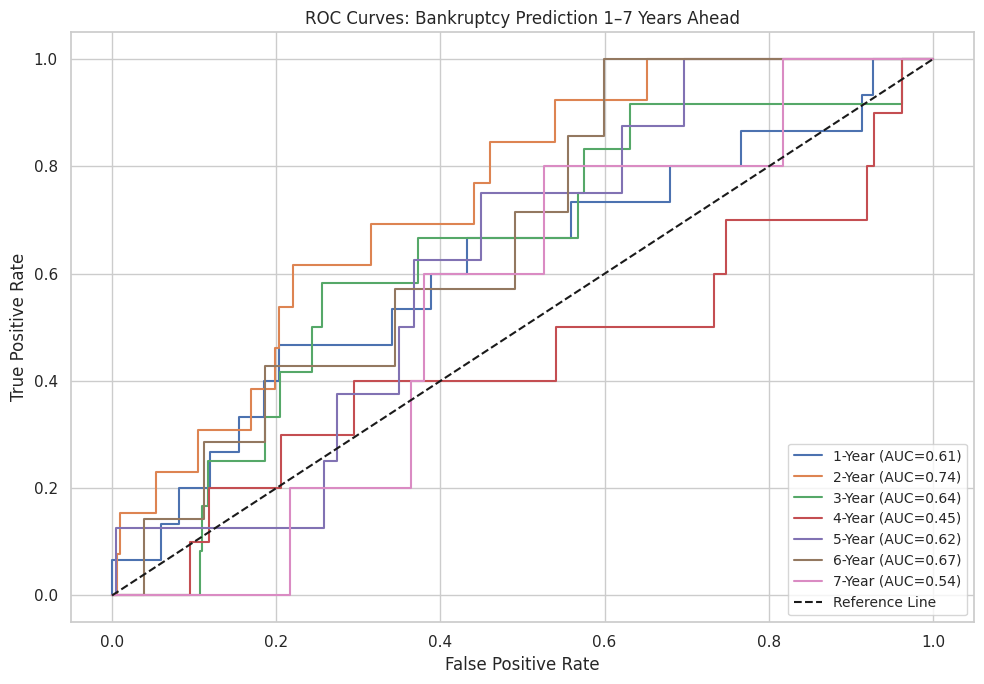

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.preprocessing import StandardScaler

# create new dataframe to sort the company IDs in WRDS and the year
# ensures bankruptcy indicator shifts correctly for each company in each year
df_sorted = df.sort_values(by=['GVKEY', 'fyear'])
target_years = [1, 2, 3, 4, 5, 6, 7]  # will be predicting n-years ahead, n=1-7

# future bankruptcy indicators for each company
# shift(-year_ahead) looks ahead 1–7 years for each company to see if bankruptcy occurred

for year_ahead in target_years:
    df_sorted[f'dlrsn_{year_ahead}yr'] = df_sorted.groupby('GVKEY')['dlrsn'].shift(-year_ahead)

# identify base year (AKA 2013)
df_2013 = df_sorted[df_sorted['fyear'] == 2013]

# financial ratios to be used as features
features = [
    'working_capital_ratio', 'roa', 'ebit_to_assets', 'debt_to_equity',
    'interest_coverage', 'ocf_to_debt', 'receivables_turnover', 'payables_turnover_days'
]

# standardize since some firms might be large and others small
scaler = StandardScaler()
df_2013[features] = scaler.fit_transform(df_2013[features])

# initialize ROC curve plot
plt.figure(figsize=(10, 7))

# loop through each year-ahead prediction
for year_ahead in target_years:  # 2014-2020 --> 1-7
    y = df_2013[f'dlrsn_{year_ahead}yr'] # identifies target variable
    mask = ~y.isna() # which rows have a valid target variable
    X = df_2013.loc[mask, features]  # filter 2013 df to include only rows with a known bankruptcy status n years later
    y = y[mask].astype(int)

    if len(y) > 0 and y.nunique() > 1:  # ensures the dataset isn't empty/all one class
        X_train, X_test, y_train, y_test = train_test_split(  # Splits into train and test sets
            X, y, test_size=0.20, stratify=y, random_state=42  # keeps class distribution similar using stratify=y
        )

        clf = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')  # class_weight='balanced' to handle imbalanced classes
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)  # predicted class (0 or 1)
        y_proba = clf.predict_proba(X_test)[:, 1]  # predicted probability of class 1 (bankruptcy)

        acc = accuracy_score(y_test, y_pred)  # accuracy
        auc = roc_auc_score(y_test, y_proba)  # ROC AUC score
        fpr, tpr, _ = roc_curve(y_test, y_proba)  # false positive rate (FPR) and true positive rate (TPR) for plotting ROC curve

        # prints metrics for each year ahead prediction
        print(f"\n--- {year_ahead}-Year Ahead Prediction ---")
        print(f"Accuracy: {acc:.2f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print(f"ROC AUC: {auc:.2f}")

        # adds each line to ROC plot
        plt.plot(fpr, tpr, label=f'{year_ahead}-Year (AUC={auc:.2f})', linewidth=1.5)

# add diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label='Reference Line')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Bankruptcy Prediction 1–7 Years Ahead')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights

For output comprehension purposes (just quick notes).

ChatGPT was used for assistance: https://chatgpt.com/share/680c4de7-96d0-8007-8163-5bcd797ab1ce

| Year Ahead | Accuracy | Class 1 Recall | Class 1 Precision | ROC AUC | Contextual Insight                                                                 |
|------------|----------|----------------|--------------------|---------|-------------------------------------------------------------------------------------|
| 1-Year     | 0.66     | 0.47           | 0.03               | 0.61    | Picks up nearly half of at-risk firms — useful for flagging short-term risk        |
| 2-Year     | 0.47     | 0.85           | 0.04               | 0.74    | Very high recall — excellent for early screening, but very high false alarm rate   |
| 3-Year     | 0.70     | 0.58           | 0.04               | 0.64    | Most balanced performance; good accuracy and decent early warning signal            |
| 4-Year     | 0.42     | 0.50           | 0.02               | 0.45    | Weaker ROC AUC suggests ratios less predictive at this horizon                     |
| 5-Year     | 0.42     | 0.75           | 0.02               | 0.62    | Stronger recall again, but too many false positives for practical use               |
| 6-Year     | 0.55     | 0.57           | 0.02               | 0.67    | Somewhat usable for medium-range forecasting — but high caution needed              |
| 7-Year     | 0.56     | 0.60           | 0.02               | 0.54    | May indicate long-term risk signals, but lacks precision to be trusted alone        |


| Aspect                          | Insight                                                                                   |
|---------------------------------|--------------------------------------------------------------------------------------------|
| Prediction Goal                 | Detecting future bankruptcies — highly imbalanced classification (few bankruptcies)       |
| Best Short-Term Model           | 1-Year Ahead — decent recall (0.47), ROC AUC > 0.6, fair accuracy                         |
| Best Long-Term Signal           | 2-Year and 3-Year Ahead — very high recall (up to 0.85), shows early warning potential     |
| False Positives Issue           | Precision is very low across the board — means many healthy firms are flagged as at-risk  |
| ROC AUC Value                   | Generally 0.6–0.74, indicating the model can distinguish signal from noise, but imperfect  |
| Use of Financial Ratios         | Key ratios like ROA, OCF-to-Debt, and Interest Coverage are likely aiding recall           |
| Potential Model Adjustments     | Try SMOTE, class weight tuning, or anomaly detection to handle class imbalance            |
| Practical Use Case              | Model can act as an **early warning system** for further human investigation              |
| Recommendation                  | Don't use predictions as final judgment — use to **prioritize audits or deeper analysis** |


In [ ]:
# check distribution of bankruptcy data in the training set
print("\nTraining set y distribution:")
print(y_train.value_counts(normalize=True))

# check distribution of bankruptcy data in the training set
print("\nTest set y distribution:")
print(y_test.value_counts(normalize=True))



Training set y distribution:
dlrsn_7yr
0    0.985788
1    0.014212
Name: proportion, dtype: float64

Test set y distribution:
dlrsn_7yr
0    0.98708
1    0.01292
Name: proportion, dtype: float64


## DON'T USE: JUST AN ATTEMPT!



### Classifcation Industry-Specific Prediction

ChatGPT was used for assistance: https://chatgpt.com/share/680c52ec-6ca0-8007-b3a8-791a369b2b48


=== Industry Code 3520 ===
Accuracy:      0.381
Confusion Matrix:
[[439 751]
 [  8  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.37      0.54      1190
           1       0.04      0.78      0.07        37

    accuracy                           0.38      1227
   macro avg       0.51      0.58      0.30      1227
weighted avg       0.95      0.38      0.52      1227

ROC AUC:       0.583

=== Industry Code 3510 ===
Accuracy:      0.804
Confusion Matrix:
[[483 110]
 [ 10  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       593
           1       0.08      0.50      0.14        20

    accuracy                           0.80       613
   macro avg       0.53      0.66      0.52       613
weighted avg       0.95      0.80      0.87       613

ROC AUC:       0.758

=== Industry Code 1010 ===
Accuracy:      0.776
Confusion Matrix:
[[381 108]


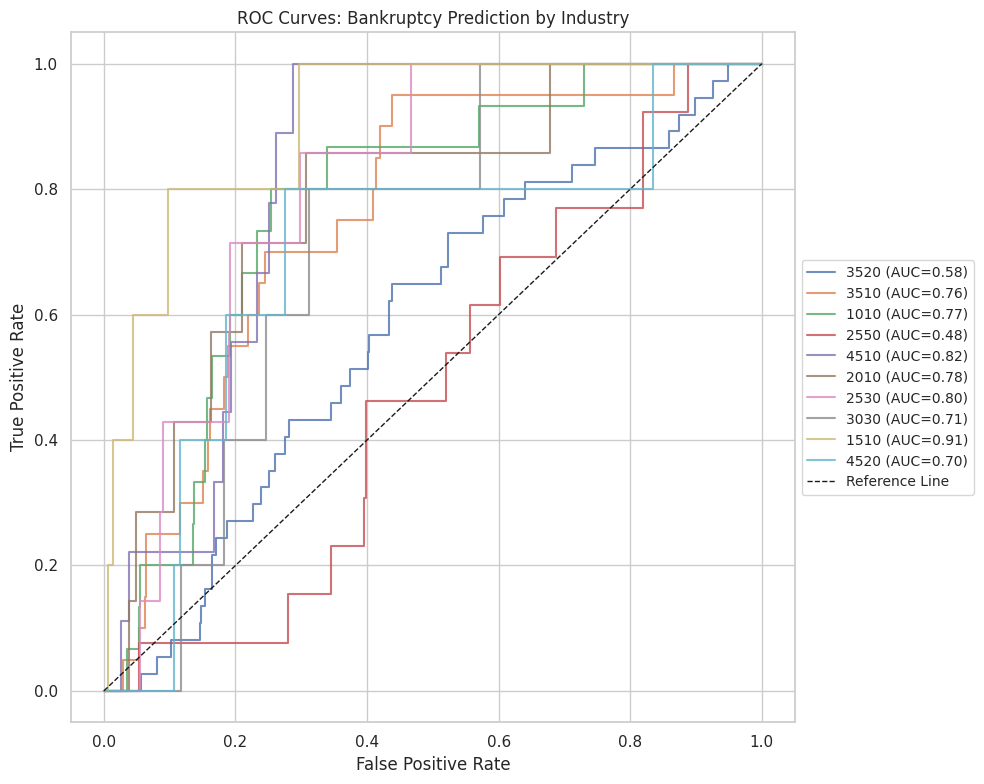

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)
from sklearn.preprocessing import StandardScaler

# GICS industries identified in EDA
focus_codes = [3520, 3510, 1010, 2550, 4510,
               2010, 2530, 3030, 1510, 4520]

# financial ratios (explanatory variables)
features = [
    'working_capital_ratio', 'roa', 'ebit_to_assets', 'debt_to_equity',
    'interest_coverage', 'ocf_to_debt', 'receivables_turnover',
    'payables_turnover_days'
]

# standardize features since some firms are big and some are small
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


plt.figure(figsize=(10, 8))

# loop through industries
for code in focus_codes:  # code refers to GICS code
    # df that subsets to specific industry in loop
    df_code = df[df['ggroup'] == code]

    y = (df_code['dlrsn'] == 1).astype(int)  # bankruptcy is target variable
    X = df_code[features]  # ratios are explanatory

    # skip if there is only one class (need more than 2 for a class)
    if y.nunique() < 2:
        print(f"Skipping code {code}: insufficient data or single-class outcome")
        continue

    # stratify y again to ensure even split of bankruptcy in train & test data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )

    # fit balanced logistic regression to handle class imbalances
    clf = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
    clf.fit(X_train, y_train)

    y_pred  = clf.predict(X_test)  # predicted class (0 or 1)
    y_proba = clf.predict_proba(X_test)[:, 1] # predicted probability of class 1 (bankruptcy)


    acc = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)
    cr  = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)


    print(f"\n=== Industry Code {code} ===")
    print(f"Accuracy:      {acc:.3f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)
    print(f"ROC AUC:       {auc:.3f}")


    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{code} (AUC={auc:.2f})', linewidth=1.5, alpha=0.8)

plt.plot([0, 1], [0, 1], 'k--', label='Reference Line', linewidth=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Bankruptcy Prediction by Industry')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


### Insights

For output comprehension purposes (just quick notes).

ChatGPT was used for assistance: https://chatgpt.com/share/680c4f23-96e0-8007-bdde-8a43d647d06f

| Industry Code & Name                                          | Accuracy | Precision (1) | Recall (1) | F1-Score (1) | ROC AUC | Notable Insights |
|---------------------------------------------------------------|----------|---------------|------------|--------------|---------|------------------|
| **3520 - Pharmaceuticals, Biotechnology & Life Sciences**     | 0.381    | 0.04          | 0.78       | 0.07         | 0.583   | Very poor performance; strong class imbalance; model predicts minority class poorly overall. |
| **3510 - Health Care Equipment & Services**                   | 0.804    | 0.08          | 0.50       | 0.14         | 0.758   | Decent ROC AUC despite poor precision for minority class; better balance than Pharmaceuticals. |
| **1010 - Energy**                                             | 0.776    | 0.08          | 0.67       | 0.15         | 0.772   | Similar to Health Care; better recall than precision on minority class. |
| **2550 - Consumer Discretionary Distribution & Retail**       | 0.429    | 0.04          | 0.62       | 0.08         | 0.480   | Weak ROC AUC and overall poor performance. Significant imbalance issues. |
| **4510 - Software & Services**                                | 0.809    | 0.04          | 0.44       | 0.07         | 0.818   | High AUC but still poor precision/recall for minority class. |
| **2010 - Capital Goods**                                      | 0.838    | 0.03          | 0.43       | 0.05         | 0.779   | Excellent accuracy; poor handling of minority class. |
| **2530 - Consumer Services**                                  | 0.774    | 0.06          | 0.71       | 0.11         | 0.803   | Better recall for minority class; precision remains low. |
| **3030 - Household & Personal Products**                      | 0.841    | 0.10          | 0.20       | 0.13         | 0.714   | Tiny support for class 1; very poor generalization. |
| **1510 - Materials**                                          | 0.925    | 0.07          | 0.60       | 0.13         | 0.909   | Highest ROC AUC; great majority class handling but underperforms on minority class. |
| **4520 - Technology Hardware & Equipment**                    | 0.847    | 0.03          | 0.40       | 0.06         | 0.696   | High accuracy but very weak performance for minority class. |

---

| Metric            | Best Value | Industry Code & Name             | Worst Value | Industry Code & Name |
|-------------------|------------|-----------------------------------|-------------|-----------------------|
| Accuracy          | 0.925      | **1510 - Materials**              | 0.381       | **3520 - Pharmaceuticals, Biotechnology & Life Sciences** |
| Precision (1)     | 0.10       | **3030 - Household & Personal Products** | 0.03        | **2010 - Capital Goods, 4520 - Technology Hardware & Equipment** |
| Recall (1)        | 0.78       | **3520 - Pharmaceuticals, Biotechnology & Life Sciences** | 0.20        | **3030 - Household & Personal Products** |
| F1-Score (1)      | 0.15       | **1010 - Energy**                 | 0.05        | **2010 - Capital Goods** |
| ROC AUC           | 0.909      | **1510 - Materials**              | 0.480       | **2550 - Consumer Discretionary Distribution & Retail** |

# Next Steps


We will not be going forward with an industry-specific approach to bankruptcy prediction due to time, knowledge, and data constraints (i.e., there aren't enough bankruptcies in each industry to make a robust model). *Therefore*, we will focus on **bankruptcy prediction "n years ahead"**, using 8 versatile metrics to still account for different industries (i.e., it's normal for some industries have a particular ratio be high/low).